## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [6]:
import os
import keras
import itertools

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25

In [14]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
#optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='Adam')

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)

50000/50000 [==============================] - 3s 65us/step - loss: 1.5699 - acc: 0.4337 - val_loss: 1.5119 - val_acc: 0.4653
Epoch 42/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5723 - acc: 0.4368 - val_loss: 1.5183 - val_acc: 0.4586
Epoch 43/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5741 - acc: 0.4332 - val_loss: 1.5173 - val_acc: 0.4644 loss: 1.5729 - acc: 0
Epoch 44/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.5653 - acc: 0.4350 - val_loss: 1.4983 - val_acc: 0.4659: 0 - ETA: 0s - loss: 1.5648 - a
Epoch 45/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5694 - acc: 0.4350 - val_loss: 1.5246 - val_acc: 0.4600
Epoch 46/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5672 - acc: 0.4338 - val_loss: 1.5243 - val_acc: 0.4601
Epoch 47/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5613 - acc: 0.4362 - val_loss: 1.4884 - val_acc:

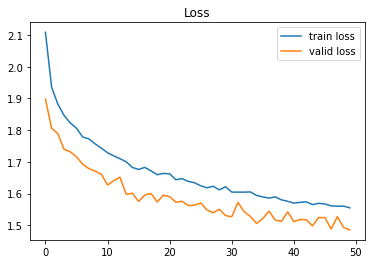

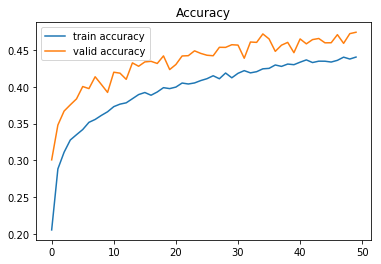

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")

plt.legend()
plt.title("Accuracy")
plt.show()

In [18]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=0.5)
model.summary()
#optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='Adam')

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 3s 69us/step - loss: 2.0810 - acc: 0.2036 - val_loss: 2.1344 - val_acc: 0.2104
Epoch 49/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.0895 - acc: 0.1988 - val_loss: 2.1032 - val_acc: 0.1939
Epoch 50/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.0775 - acc: 0.2021 - val_loss: 2.0912 - val_acc: 0.2124


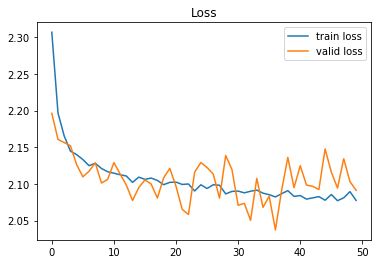

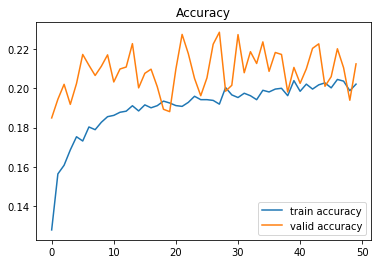

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")

plt.legend()
plt.title("Accuracy")
plt.show()

In [20]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=0.1)
model.summary()
#optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='Adam')

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 3s 69us/step - loss: 1.2226 - acc: 0.5607 - val_loss: 1.3547 - val_acc: 0.526719
Epoch 48/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.2172 - acc: 0.5630 - val_loss: 1.3472 - val_acc: 0.5235
Epoch 49/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.2136 - acc: 0.5630 - val_loss: 1.3634 - val_acc: 0.5222
Epoch 50/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2167 - acc: 0.5615 - val_loss: 1.3699 - val_acc: 0.5152


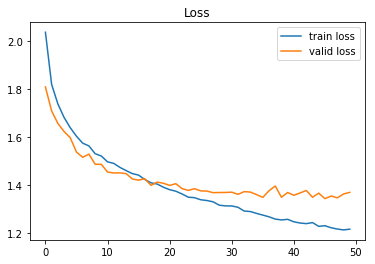

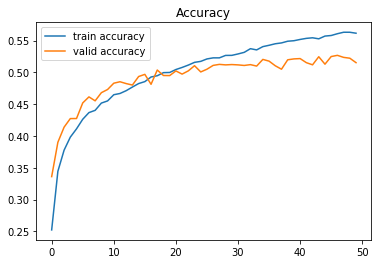

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")

plt.legend()
plt.title("Accuracy")
plt.show()